# **Handwritting Digit Recognition**
by Aashamsu Nepal for deep learing course Assigment 2

so first i am doing to do is import dataset from tensorflow_datasets anddivide into learning and testing ie 80 20

and the create some usefull function like initiling first martic with np.randan create action function

and the maths do back propagations mahi in hand then empliment it in coding

and crea a loop to run evey thing



# Initial SetUp

## 1 Import all packages



In [1]:
!pip install tensorflow_datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds




## 2 - Dataset

I will be using the tensorflow_datasets library to load the MNIST dataset. This library provides access to MNIST data, but when I use tfds.load(), it returns the dataset as an object rather than a direct NumPy array. It also provides the total dataset length of Dataset ie 60000. I will convert the dataset into a NumPy array and split into two X and Y ,X be the image in  and Y being the lable.



*   load dataset
*   convert to nparray
*   split the array to X and Y ,image and lable
*   reshape the array from 28,28 to 782
*   also normalize the X dataset




no. shoud be 3


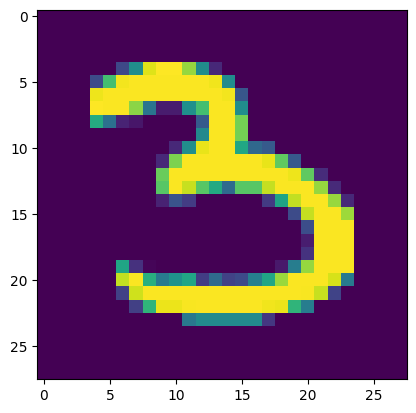

In [2]:
train_datasets = tfds.load("mnist",split='train').shuffle(10000).take(5000) #loading the test data using shuffle with buffor_size 10000
test_datasets = tfds.load("mnist",split='test').shuffle(10000).take(5000)
# converting it to numpy array
x_train=[]
y_train=[]
for i in tfds.as_numpy(train_datasets):
  x_train.append(i['image'])
  y_train.append(i['label'])


x_train , y_train = np.array(x_train) , np.array(y_train)
def ShowNumAndIMg():
  n=np.random.randint(0,len(train_datasets))
  plt.imshow(x_train[n])
  print(f'no. shoud be {y_train[n]}')
  return

ShowNumAndIMg()


Reshaping the x_train from 28,28 to 784 and also  normalize it:

In [3]:
d,r,c,ch =x_train.shape
# next code we are reshaping  the dataset
x_train=x_train.reshape(d,r*c)
#Normalizing
x_train=np.divide(x_train,255)

So dataset is now normalized aswell as in type that we can work on.



# 1.1 Vanilla Handwritten Digit Recognition Neural Network

This section i will use just numpy and create a Neural Network.According to 3Blue1Brown he has NN of 784 input layner 10 output and 2 hidden layer with 16 Neural each on them.



#### 1.   Funtion to initial weight and Basis

In video he is not using He and Xavier initialization so i will be initialization with help of numpy.random.randn.

In [8]:
def initial_values(layer_dims):
  '''
  this funtction should take in our case [784,16,16,10] where 784,is input layer but middle two layer 16,16 will have 16 Neurons and lat 10 output
  so it shoud give
  w1.shaep=(16,784)
  w2.shape=(16,16)
  w6.shape=(10,16)
  '''
  allmatrix = {}
  for n in range(1,len(layer_dims)):
    allmatrix['W' + str(n)]=np.random.randn(layer_dims[n],layer_dims[n-1])
    allmatrix['b' + str(n)]=np.zeros((layer_dims[n], 1))

  return allmatrix


{'W1': array([[-1.37780703, -0.23807009],
       [ 2.25854978, -0.52685407],
       [-0.05927726, -0.0184617 ],
       [ 0.4126282 , -0.09529366],
       [-0.51680108,  1.54029506],
       [-0.29347896, -0.2518051 ],
       [-0.15202714,  1.27580996],
       [-0.9795014 , -0.85916377],
       [ 0.09079154,  0.79128216],
       [-0.73323349, -0.87227134],
       [ 0.12572458,  1.73054083],
       [ 0.365568  ,  1.71226296],
       [-0.40127982,  0.01178727],
       [-0.12077761,  1.12924984],
       [ 0.90933794, -0.74621103],
       [-0.75669288, -1.73639337]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-1.73708114,  0.88897859, -0.35146195, -0.78951655,  1.85451997,
         0.75152603, -1.37177922, -0.65778308,  0.87677429,  0.56158515,
        -0.34781879, -0.04501667,  0.18474783, -0.2737815 , -0.

#### 2.  Activation Function

in the video he did mention Leaky ReLU aswell as sigmod function

In [ ]:
def Sigmoid(x):
    sigmoid =  np.divide(1,1+np.exp(-x) )
    return sigmoid


def ReLU(x):
    relu =   np.maximum(0,x)
    return relu

## 1.2 - The Training Loop #

### 1.2.1   Forward Pass 

here function will take in input data and params in this case the math will be as follows:

x->a1->a2->y

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}$$ 
$$a^{[1] (i)} =  ReLU(z^{[1] (i)})$$
$$ $$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}$$
$$a^{[2] (i)} = a^{[2] (i)} = Relu(z^{ [2] (i)})$$
$$ $$
$$z^{[3] (i)} = W^{[3]} a^{[2] (i)} + b^{[3] (i)}$$
$$\hat{y}^{(i)} = a^{[3] (i)} = \sigma(z^{ [3] (i)})$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \text{if } a^{[2](i)} > 0.5 \\ 0 & \text{otherwise } \end{cases}\tag{5}$$



In [ ]:
def forwardPass(X,params):
    '''
    if params is ie if nn layers are:
    2->2 will be len of params
    3->4 will be len of params
    4->6 will be len of params
    5->8 will be len of params
    and so on but 2 layer nn is not in our scope and from above i can make a equation:
    len()/2+1 as rightside is just multiple of 2     
    lets try this 
    '''
    cache={}
    layers=int(len(params) / 2)+1
    
    for i in range(1,layers):
        if i == 1:
            # first z1 with dot product of w1.x +b1
            cache['Z'+str(i)]=np.dot(params["W"+str(i)],X) + params["b"+str(i)]
            cache['A'+str(i)]=ReLU(cache['Z'+str(i)])
        elif i == layers-1:
            # last will sigmioid action vation for output layer 
            cache['Z'+str(i)]=np.dot(params["W"+str(i)],cache['A'+str(i-1)]) + params["b"+str(i)]
            cache['A'+str(i)]=sigmoid(cache['Z'+str(i)])
        else:
            # for all hidden layers 
            cache['Z'+str(i)]=np.dot(params["W"+str(i)],cache['A'+str(i-1)]) + params["b"+str(i)]
            cache['A'+str(i)]=ReLU(cache['Z'+str(i)])

    assert(cache["A"+str(layers-1)].shape == (10, X.shape[1]))
    return cache["A"+str(layers-1)], cache

### 1.2.2  Computing the Cost

sum of square of the diffrences between each of the output layer (Sum of Squared Errors) before that i need to create a function to change our y_train which is One Hot Encoding 

In [1]:
def onehotencoder(Y):
    ohe = np.zeros((Y.size, Y.max() + 1))
    ohe[np.arange(Y.size), Y] = 1
    ohe = ohe.T
    return ohe

def costfunction(x,y):
    y=onehotencoder(y)
    length=y.shape(1)
    cost=np.sum((x-y)**2)/length
    return cost

### 1.2.3 Backpropagation (Backward Pass)

here we need to find how much  change shoud be made so that our cost becomes less or we need to find change a change delatc in function that poit to less or towards the out put we cant.we can achive this by calculas as we c our cost function has 3 main varialbe for last layer that will w3 b3 and a3 we can achive this by finding the dC with respect to dw3 ,dc with respect dta3 and dc with b3 applying chain rules and doing some maths we will get:

for output and last hidden layer 
$$dZ^{[3]} = A^{[3]} - Y$$
$$dW^{[3]} = \frac{1}{m} dZ^{[3]} A^{[2]T}$$
$$dB^{[3]} = \frac{1}{m} \Sigma {dZ^{[3]}}$$
between hidden layers in our case that is 2
$$dZ^{[2]} = W^{[3]T} dZ^{[3]} .* g^{[2]\prime} (z^{[2]})$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
and between input and first hidden layer 
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

In [ ]:
def dsig(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid * (1 - sigmoid)

def backward_propagation(parameters, cache, X, Y):
    # m is just number of iteam or in or case pixel
    m = X.shape[1]
   # getiing the values of weight and activation we got from frwardpass from paras 
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]  
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    # As our y_train is labled in numbers eg 8 here using the function crating a matrix 
    y=onehotencoder(Y)
    # Backward propagation: calculate dW3, db3, dW2, db2, dW1, db1. 
    dZ3 = A3 - y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m

    dZ2 = np.dot(W3.T, dZ3) * dsig(A2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dZ1 = np.dot(W2.T, dZ2) * dsig(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3,
            }
    
    return grads

### 1.2.3 - Update Parameters
Function to upadte parama accoudring to gradiantdecent

In [ ]:
def update_parameters(parameters, grads, learning_rate = 0.05):
    # getting all wegihts and biases from parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    #  same for dwn dbn from grads 
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    # upating the paramets with learning rate 
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    # creating new para and returning it
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                 }
    return parameters

## 1.2 - The Neural Network Model


Here we create loop as well initial the models parametrs 


In [ ]:
def nn_model(X, Y, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of flaten images
    Y -- labels of image 
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    costs -- python list of the cost after 1000 iterations
    """
    costs = []
    np.random.seed(3)    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(10, 16,16,10)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A3, cache".
        A3, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

    return parameters, costs

### 1.2.1 Using our Model (Parameters) to make Predictions


In [1]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A3, cache = forward_propagation(X, parameters)
    predictions = A3 > 0.5
    
    return predictions

### 1.2.2 Running the model

In [ ]:
parameters, costs = nn_model(x_train, y_train, num_iterations = 10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))